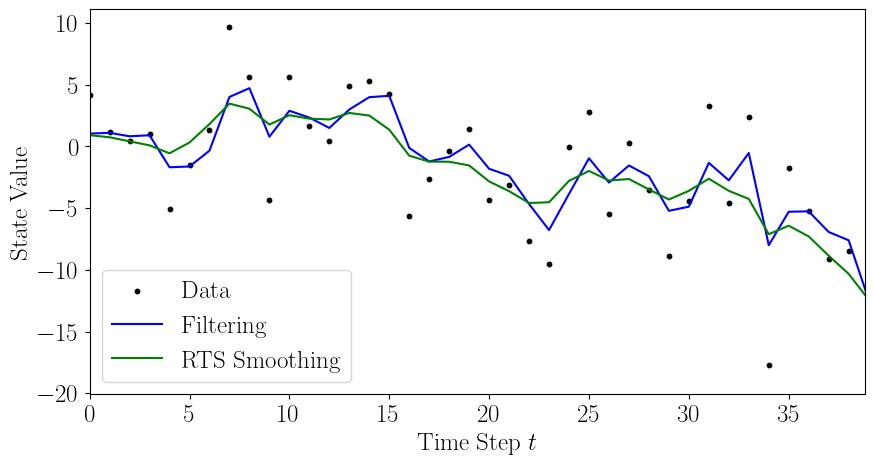

<Figure size 640x480 with 0 Axes>

In [ ]:
from pykalman import KalmanFilter
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 18})

# Generate synthetic data: a random walk with noise
np.random.seed(42)
n = 40
true_state = np.cumsum(np.random.randn(n))  # True state evolution
observations = true_state + np.random.normal(0, 5, n)  # Noisy observations


# Define Kalman filter with a simple random walk model
kf = KalmanFilter(
    transition_matrices=[1],
    observation_matrices=[1],
    initial_state_mean=0,
    initial_state_covariance=1,
    transition_covariance=[1],  # Process noise covariance
    observation_covariance=[3],  # Measurement noise covariance
)

# Apply the Kalman filter
filtered_state_means, filtered_state_covariances = kf.filter(observations)

# Apply RTS smoother
smoothed_state_means, smoothed_state_covariances = kf.smooth(observations)

# Plot results
plt.figure(figsize=(10, 5))
plt.scatter(range(n), observations, color='k', s=10, label='Data')
plt.plot(filtered_state_means, color='blue', label='Filtering')
plt.plot(smoothed_state_means, color='green', label='RTS Smoothing')


plt.xlim(0, n-1.2)
plt.xlabel(r'Time Step $t$')
plt.ylabel('State Value')
plt.legend()
plt.show()

#plt.savefig("./results/kf-filter-smoother.pdf", format='pdf', bbox_inches='tight')